# 14. TP  Neural Networks (teacher)

#### enseignant: Anastasios Giovanidis 2022 - 2023
#### date: 10 January 2023

#### student name or binome:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random

## Exercise 1 (SGD)

The aim of the exercise is to familiarise you with the Stochastic Gradient Descent, and its parameters (min-batch size, learning rate). We will repeat our classic Linear Regression Excercise but will solve it with SGD. 

We first generate artificial data. We will work with linear models of the form 

$y = \beta_0+\beta_1 x_1 + \beta_2 x_2 + \epsilon$.

In [2]:
n = 60 # sample size
b0 = +5 # real intercept (unobserved)
b1 = np.array([2, -3]) # real slope (unobserved)

In [3]:
# Extra Added Noise:
mue, sigmae = 0, 5 # error mean and standard deviation
#
# Limits of the x-axis:
xl, xh = 0, 10

In [4]:
def genSample(n,b0,b1,sigmae,xLow,xHigh,seedit=199,size=1):
    if type(seedit)==int:
        np.random.seed(seedit)
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed(seedit+k)
            x.append(np.random.uniform(xl,xh,n))
    else:
        np.random.seed()
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed()
            x.append(np.random.uniform(xl,xh,n))
    y = b0+Er
    for k in range(size):
        y +=b1[k]*x[k]
    #
    # Output
    if size==1:
        return (x[0], y, Er)
    else:
        return (x, y, Er)

In [5]:
(x,y,Er) = genSample(n,b0,b1,sigmae,xl,xh,seedit=199,size=2)

In [6]:
data1 = {'x1': x[0], 'x2': x[1], 'error': Er, 'y': y}
df_slr = pd.DataFrame(data=data1)
#df_slr

We want to evaluate various mini-batch Stochastic Gradient Descent variations (SGD) each with a different value of the mini-batch size $m$ and the learning rate.

You need to fill in the part of code below TODO.

Then, use the SGD to find theconverged three parameters $(b_0,b_1,b_2)$
for the following cases

- mini-batch size: $m=1$, $m=10$ and $m=n$, where $n$ is the full data-size
- learning rate: eta = 0.04, eta = 0.01 and eta = 0.001

Explain your observations. 

In [12]:
# Parameters
T = 1000 #number of epochs
m = 10 # Batch-size m is less than or equal to n
eta = 0.01 # Learning rate

Fill in the parts of the following function marked by TODO.

In [13]:
def LinReg_SGD(T,m,eta, printit=True):
    # Initialise the unknown linear parameters
    b1_init = np.random.uniform()
    b2_init = np.random.uniform()
    b0_init = np.random.uniform()
    #
    # Save the values per step in a list
    b0 = b0_init
    b0List = [b0]
    b1 = b1_init
    b1List = [b1_init]
    b2 = b2_init
    b2List = [b2]
    #
    # Iterate over epochs
    #
    for t in range(T):
        # choose the mini-batch indices from the data
        if m < n:
            indx =  np.random.choice(np.arange(n), size=m, replace=False)
        else:
            indx = np.arange(n) # use this option if you want to use all data per iteration.
        #
        # use x_batch and y_batch to store the batch of data
        y_batch = y[indx]
        x_batch = [ [x[0][i],x[1][i]] for i in indx ]
        x_batch1 = [x_batch[j][0] for j in range(m)]
        x_batch2 = [x_batch[j][1] for j in range(m)]
        #
        # Calculate the derivatives
        # TODO

        #
        # Update by stochastic gradient descent for batch-size m
        # TODO

        #
        # Append the actual value to a list 
        b0List.append(b0)
        b1List.append(b1)
        b2List.append(b2)
        #
        if t%100 == 0 and printit == True:
            print('Epoch', t, "b0=", b0, "b1=", b1, "b2=", b2)
    return [b0List, b1List, b2List, b0, b1, b2]

In [14]:
[b0List, b1List, b2List, b0, b1, b2] = LinReg_SGD(T,m,eta,printit=False)

In [15]:
# Print the final converged values
print([b0, b1, b2])

[3.411459685238228, 2.2857359789836216, -2.740384761439101]


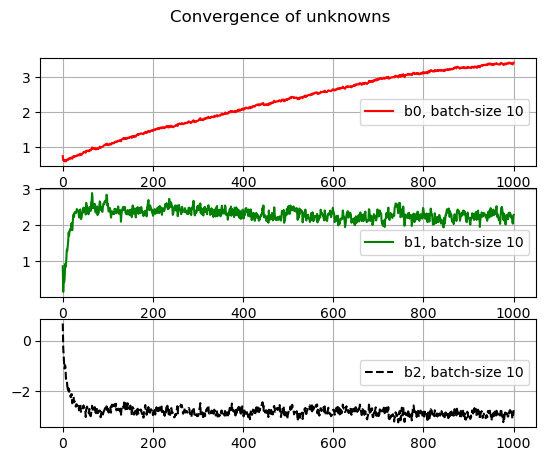

In [16]:
fig, axs = plt.subplots(3)
fig.suptitle('Convergence of unknowns')
#
axs[0].plot(b0List,'r',label='b0, batch-size 10')
axs[0].legend(loc=7)
axs[0].grid()
#
axs[1].plot(b1List,'g',label='b1, batch-size 10')
axs[1].legend(loc=7)
axs[1].grid()
#
axs[2].plot(b2List,'--k',label='b2, batch-size 10')
axs[2].legend(loc=7)
axs[2].grid()

## Exercise 2 (MNIST classification using pytorch)

In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torch import nn, save, load
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
print(torch.__version__)

1.13.0


We will use the MNIST dataset which is already available in the torchvision library. 

pytorch uses tensor format to process data. First we load the train and test sets.

In [3]:
train = datasets.MNIST(root = 'data',download=True, train=True, transform=ToTensor())
#
test  = datasets.MNIST(root = 'data',download=True, train=False, transform=ToTensor()) 

At the heart of PyTorch data loading utility is the torch.utils.data.DataLoader class. It represents a Python iterable over a dataset, with support for automatic batching (among other features).

In [4]:
dataset_train = DataLoader(train, batch_size=32)
#
dataset_test = DataLoader(test, batch_size=32)

Let us see some examples for the train dataset mini-batch produced.

In [5]:
examples = enumerate(dataset_test)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([32, 1, 28, 28])

Let us now visualise some data from the example batch.

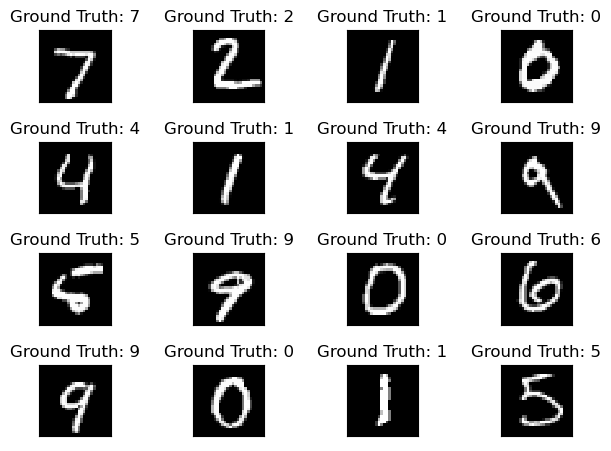

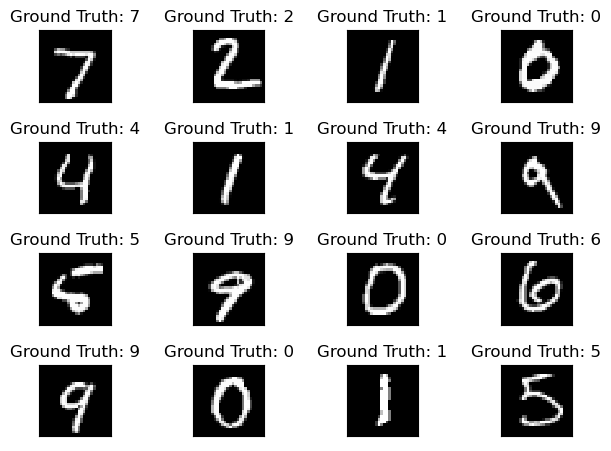

In [6]:
fig = plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

Image Classifier Neural Network. It is based on the nn.Module base class. 
We use the nn.Sequential to add layers and activation functions one after the other. Here we will only use the fully connected linear layers nn.Linear, which applies a linear transformation to the incoming data: $y=xA^T+b$. In fact in the example architecture proposed below, there is a single hidden linear layer with input dimension 1000.

The first layer Flattens the $(1,28,28)$ size images in a single tensor.

Activation functions can be found here:

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

The last layer included is the LogSoftmax, since we are interested in a multi-class classification problem 

https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html


In [7]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 1000, bias = True),
            nn.ReLU(),
            nn.Linear(1000, 10),
            nn.LogSoftmax(dim=1)
            #
            # Alternative: Using Convolutional NN (better results)
            #nn.Conv2d(1,32, (3,3)),
            #nn.ReLU(),
            #nn.Conv2d(32,64, (3,3)),
            #nn.ReLU(),
            #nn.Conv2d(64,64, (3,3)),
            #nn.ReLU(),
            #nn.Flatten(),
            #nn.Linear(64*(28-6)*(28-6),10)
            #nn.LogSoftmax(dim=1)
        )
    def forward(self, x):
        return self.model(x)

Instance of the neural network, loss, optimizer. We choose SGD as optimiser with learning-rate lr. The SGD takes also as advanced feature momentum. We use as loss function the NLLLoss() from (https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) which is combined with the LogSoftmax layer. As an alternative Loss: we can use the CrossEntropyLoss, but in that case we need to remove 
the LogSoftmax layer from our Network 

In [8]:
clf = ImageClassifier().to('cpu')
opt = SGD(clf.parameters(), lr = 1e-3, momentum = 0.5)
loss_fn = nn.NLLLoss()
# 
# Alternative loss:
#loss_fn = nn.CrossEntropyLoss()
#
# Alternative optimiser: 
#opt = Adam(clf.parameters(), lr = 1e-3)

Training flow: in the pytorch environment the training is done as follows. One batch after the other is picked from the dataset_train, it does a forward pass of the neural network to give an estimation yhat and then the loss is calculated by the loss function, given the real labels. To apply backprop, the pytorch environment first requires to zero the gradient entry values with opt.zero_grad(), then do the backward propagation of the gradients with the loss.backward() and then update the parameters of the neural network by opt.step().

In [9]:
if __name__ == "__main__":
    for epoch in range(6): #train for 6 epochs
        for indx_batch, batch in enumerate(dataset_train):
            X,y = batch
            X, y = X.to('cpu'), y.to('cpu')
            #
            yhat = clf(X)
            loss = loss_fn(yhat, y)
            
            # Apply backprop
            opt.zero_grad()
            loss.backward()
            opt.step()
        print(f"Epoch:{epoch} loss is {loss.item()}")

Epoch:0 loss is 1.0972838401794434
Epoch:1 loss is 0.5643971562385559
Epoch:2 loss is 0.38305532932281494
Epoch:3 loss is 0.29909586906433105
Epoch:4 loss is 0.2533709704875946
Epoch:5 loss is 0.22529256343841553


save the trained NN

In [10]:
with open('model_state.pt', 'wb') as f:
    save(clf.state_dict(), f, _use_new_zipfile_serialization=False)

re-load the trained NN

In [11]:
clf = ImageClassifier().to('cpu')
#
with open('model_state.pt', 'rb') as f:
    clf.load_state_dict(load(f))

Test prediction: we need to shift the neural network to evaluation mode with clf.eval(). We use the commande torch.no_grad() which leaves the parameters unchanged without updates. Then for all batches in the dataset_test, it does a forward pass in the neural network to calculate the output. Then calculates the test_loss with the loss function and does a classification prediction by assigning for each entry the class with the maximum LogSoftmax output dimension. The number of correctly predicted labels is found by the pred.eq(target) command.

In [25]:
def test():
    test_losses = list()
    clf.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in dataset_test:
            output = clf(data)
            test_loss += loss_fn(output, target).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(dataset_test.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(dataset_test.dataset),
    100. * correct / len(dataset_test.dataset)))

In [26]:
test()


Test set: Avg. loss: 0.0113, Accuracy: 9015/10000 (90%)



In [27]:
with torch.no_grad():
    output = clf(example_data)

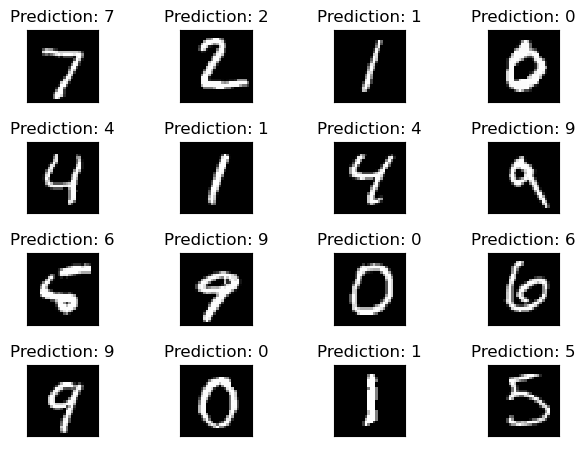

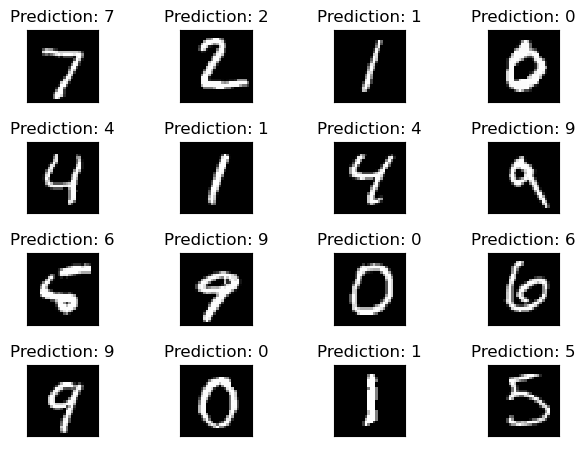

In [28]:
fig = plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
fig

**Question:** how many unknown parameters are there in the ImageClassifier NN? 

**Exercise** Modify the ImageClassifier() Neural Network, by reducing/incresing the dimension and/or adding more layers so that it becomes deeper, and/or changing the activation. In each modification calculate how many unknowns there are as parameters in the Neural Network that you propose. How does the number of parameters affect the convergence? Can you find an architecture that improves the above test-accuracy of $90\%$? 

- you can also play with the SGD parameters of the learning rate and the mini-batch size. 

- if running the NN is very heavy for your CPU try the google colab environment and use GPU.

## Exercise 3 (Wine Quality using Keras)

**Objectives :**

 - Predict the **quality of wines**, based on their analysis.
 - Understanding the principle and the architecture of a regression with a dense neural network. 

The **[Wine Quality datasets](https://archive.ics.uci.edu/ml/datasets/wine+Quality)** are made up of analyses of a large number of wines, with an associated quality (between 0 and 10)  
This dataset is provide by :  
Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez  
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal, @2009  
This dataset can be retreive at [University of California Irvine (UCI)](https://archive-beta.ics.uci.edu/ml/datasets/wine+quality)


Due to privacy and logistic issues, only physicochemical and sensory variables are available  
There is no data about grape types, wine brand, wine selling price, etc.

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality (score between 0 and 10) 
 
 What we're going to do :

 - Retrieve data
 - Preparing the data
 - Build a model
 - Train the model
 - Evaluate the result

In [1]:
import tensorflow as tf
from tensorflow import keras
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2023-01-08 18:57:30.809824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Retrieve the data.

In [2]:
dataset_name  = 'winequality-red.csv'
#
data = pd.read_csv(f'{dataset_name}', header=0,sep=';')

display(data.head(5).style.format("{0:.2f}"))
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5.00
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5.00
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5.00
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6.00
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5.00


Missing Data :  0   Shape is :  (1599, 12)


Split the data into $80\%$ for train and $20\%$ for test.

In [3]:
# ---- Split => train, test
data       = data.sample(frac=1., axis=0)     # Shuffle
data_train = data.sample(frac=0.8, axis=0)    # get 80 %
data_test  = data.drop(data_train.index)      # test = all - train

# ---- Split => x,y (y is quality)
#
x_train = data_train.drop('quality',  axis=1)
y_train = data_train['quality']
x_test  = data_test.drop('quality',   axis=1)
y_test  = data_test['quality']

print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)

Original data shape was :  (1599, 12)
x_train :  (1279, 11) y_train :  (1279,)
x_test  :  (320, 11) y_test  :  (320,)


Prepare the data: Data normalization
 - All train data must be normalized.
 - To do this we will **subtract the mean** and **divide by the standard deviation**.  

In [4]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))

# Convert ou DataFrame to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00
mean,8.32,0.53,0.27,2.57,0.09,15.85,46.68,1.00,3.31,0.66,10.43
std,1.76,0.18,0.19,1.49,0.04,10.34,33.26,0.00,0.15,0.17,1.06
min,4.70,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.37,8.40
25%,7.10,0.39,0.10,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50
50%,7.90,0.52,0.26,2.20,0.08,14.00,37.00,1.00,3.32,0.62,10.20
75%,9.20,0.64,0.42,2.60,0.09,21.00,63.00,1.00,3.41,0.73,11.10
max,15.90,1.33,1.00,15.50,0.61,72.00,289.00,1.00,3.85,2.00,14.90


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00,1279.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.06,-2.28,-1.39,-1.12,-1.69,-1.44,-1.22,-3.56,-3.74,-1.70,-1.92
25%,-0.69,-0.77,-0.88,-0.45,-0.36,-0.86,-0.74,-0.62,-0.67,-0.63,-0.88
50%,-0.24,-0.05,-0.05,-0.25,-0.16,-0.18,-0.29,-0.01,0.04,-0.21,-0.21
75%,0.50,0.63,0.77,0.02,0.07,0.50,0.49,0.59,0.60,0.44,0.64
max,4.31,4.48,3.76,8.67,11.83,5.43,7.29,3.67,3.50,8.00,4.24


Build a Neural Network model for Regression with Keras, with an Input, 2 hidden Dense linear layers and a single output for wine quality. The model in Keras includes a compiler to determine the optimiser type, the loss and the metrics used. 

In [25]:
def get_model_v1(shape):
    #
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(1, name='Output'))
    #
    model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.001),
                loss      = 'mse',
                metrics   = ['mae', 'mse'] )
    return model

In [26]:
model=get_model_v1( (11,) )

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 64)                768       
                                                                 
 Dense_n2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


Train the model. Keras allows for simplicity. In the model.fit command one is asked to determine the No. epochs, batch_size and the validation data.

In [27]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 100,
                    batch_size      = 10,
                    validation_data = (x_test, y_test))

Epoch 1/100
128/128 [==============================] - 1s 2ms/step - loss: 10.7973 - mae: 2.7783 - mse: 10.7973 - val_loss: 2.4577 - val_mae: 1.2619 - val_mse: 2.4577
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 1.7512 - mae: 1.0144 - mse: 1.7512 - val_loss: 1.5470 - val_mae: 0.9672 - val_mse: 1.5470
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 1.2578 - mae: 0.8671 - mse: 1.2578 - val_loss: 1.2736 - val_mae: 0.8727 - val_mse: 1.2736
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 1.0680 - mae: 0.7953 - mse: 1.0680 - val_loss: 1.1152 - val_mae: 0.8253 - val_mse: 1.1152
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.9427 - mae: 0.7520 - mse: 0.9427 - val_loss: 1.0128 - val_mae: 0.7818 - val_mse: 1.0128
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.8558 - mae: 0.7159 - mse: 0.8558 - val_loss: 0.9334 - val_mae: 0.7503 - val_mse: 0.9334
Epoch 7/

128/128 [==============================] - 0s 2ms/step - loss: 0.3174 - mae: 0.4403 - mse: 0.3174 - val_loss: 0.4379 - val_mae: 0.5145 - val_mse: 0.4379
Epoch 100/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3162 - mae: 0.4391 - mse: 0.3162 - val_loss: 0.4373 - val_mae: 0.5159 - val_mse: 0.4373


Evaluate the model

In [28]:
score = model.evaluate(x_test, y_test)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

10/10 [==============================] - 0s 2ms/step - loss: 0.4373 - mae: 0.5159 - mse: 0.4373
x_test / loss      : 0.4373
x_test / mae       : 0.5159
x_test / mse       : 0.4373


Display a summary of the history of DNN regression.

In [29]:
df=pd.DataFrame(data=history.history)
#display(df)
# This data can be used to plot the convergence curves over the learning epochs 
# for various train/test metrics.

Make a prediction.

In [30]:
# ---- Pick n entries from our test set
n = 200
ii = np.random.randint(1,len(x_test),n)
x_sample = x_test[ii]
y_sample = y_test[ii]

In [31]:
y_pred = model.predict( x_sample )

7/7 [==============================] - 0s 1ms/step


In [32]:
# ---- Show it
print('Wine    Prediction   Real   Delta')
for i in range(n):
    pred   = y_pred[i][0]
    real   = y_sample[i]
    delta  = real-pred
    print(f'{i:03d}        {pred:.2f}       {real}      {delta:+.2f} ')

Wine    Prediction   Real   Delta
000        4.97       6      +1.03 
001        5.93       7      +1.07 
002        5.24       6      +0.76 
003        5.97       6      +0.03 
004        4.85       5      +0.15 
005        6.17       6      -0.17 
006        5.18       4      -1.18 
007        5.24       5      -0.24 
008        6.25       5      -1.25 
009        6.17       6      -0.17 
010        6.05       4      -2.05 
011        5.42       5      -0.42 
012        6.60       7      +0.40 
013        6.75       7      +0.25 
014        4.98       6      +1.02 
015        5.59       6      +0.41 
016        5.73       6      +0.27 
017        6.59       6      -0.59 
018        5.78       6      +0.22 
019        6.55       6      -0.55 
020        5.43       5      -0.43 
021        5.24       5      -0.24 
022        5.74       6      +0.26 
023        4.59       5      +0.41 
024        5.39       5      -0.39 
025        5.05       4      -1.05 
026        6.23       6      -

**Exercise** 

- Repeat the same process for the dataset 'winequality-white.csv'. 
- Can you suggest modifications to the Neural Network model that can improve the current test mse?

- Re-write the wine prediction quality algorithm using pytorch instead of keras, and reproduce the same results.